In [42]:
import tensorflow as tf

#Save the list of files matching pattern, so it is only computed once
filenames = tf.train.match_filenames_once("./*.ipynb") 
count_num_files = tf.size(filenames)
dataset = tf.data.Dataset.from_tensor_slices(filenames)
reader = dataset.map(lambda filename: (filename, tf.read_file(filename)))

init = (tf.global_variables_initializer(), tf.local_variables_initializer())

iterator = reader.make_initializable_iterator()
next_element = iterator.get_next()

with tf.Session() as sess:
    sess.run(init)
    num_files = sess.run(count_num_files)
    sess.run(iterator.initializer)
    
    try:
        while True:
            filename, _ = sess.run(next_element)
            print(filename)
    except tf.errors.OutOfRangeError:
        pass       

print("num_files %d" % (num_files))

b'./chapter_2.ipynb'
b'./chapter_3.ipynb'
b'./chapter_4.ipynb'
b'./chapter_5.ipynb'
num_files 4


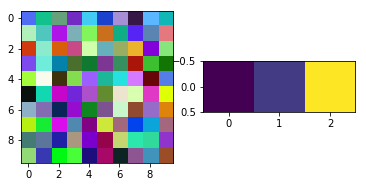

In [103]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_pixels = 100
num_klusters = 5
els_r = np.random.randint(0, 256, num_pixels)
els_g = np.random.randint(0, 256, num_pixels)
els_b = np.random.randint(0, 256, num_pixels)
pixels = np.array((
    np.random.randint(0, 256, num_pixels, dtype=np.ubyte), 
    np.random.randint(0, 256, num_pixels, dtype=np.ubyte), 
    np.random.randint(0, 256, num_pixels, dtype=np.ubyte))
).T

#pixels = []
#for i in range(num_pixels):
#    pixels.append((els_r[i], els_g[i], els_b[i]))

#print(pixels.reshape(10,10,3))    
#print(pixels.shape)

fig=plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(pixels.reshape(10,10,3))
fig.add_subplot(1, 2, 2)
plt.imshow(pixels.reshape(10,10,3)[0:1, ])


plt.show()
#print(pixels)